# Identification of tourist points of interest in Barcelona.

The goal of this project is to identify and cluster tourist points of interest in Barcelona and plot them on a map. To achieve this, we will use Scikit-learn, a popular Python library for machine learning, and the DBSCAN algorithm, which is a density-based clustering algorithm. We will also use a dataset of metadata of pictures of tourist interest points in Barcelona from Flickr.

First, we will pre-process the data to extract relevant features and remove noise. We will then use the DBSCAN algorithm to cluster the data based on their density. The DBSCAN algorithm will help us to identify clusters of tourist points of interest in the city.

Next, we will use matplotlib and smopy to visualize the clusters on a map of Barcelona. To do this, we will use the latitude and longitude information available in the dataset to plot the clusters on a map of the city.

Finally, we will interpret the results and make conclusions about the distribution of tourist points of interest in the city. By analyzing the clusters, we can identify which areas of the city have the highest concentration of tourist points of interest, and gain insights into the distribution of these points.

Overall, this project will provide a valuable tool for tourists and residents of Barcelona who are interested in exploring the city and discovering its many attractions. By visualizing the clusters on a map, we can create an interactive and informative guide that helps visitors plan their itinerary and make the most of their time in this beautiful city.

In [1]:
import random

import umap
import numpy as np
import pandas as pd
import sklearn
from sklearn import cluster

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load data
geo_df = pd.read_csv('barcelona.csv', header=0)
geo_df.sample(5)

,latitude,longitude
11071,41.382789,2.166913
8709,41.383667,2.166731
9560,41.383200,2.166591
9624,41.400642,2.157175
2737,41.403000,2.173667


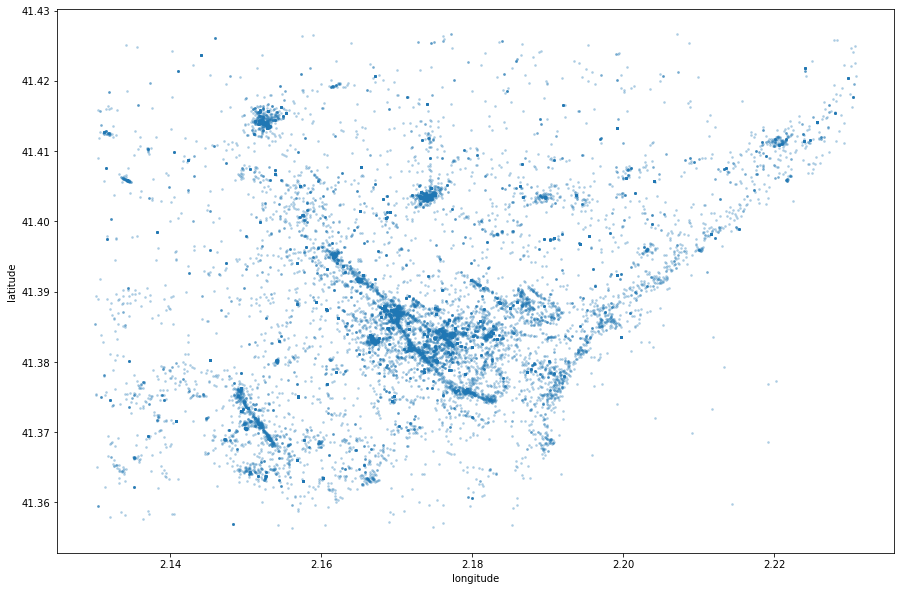

In [3]:
# Scatter plot the data
plt.rcParams['figure.figsize'] = [15, 10]

plt.scatter(x=geo_df['longitude'], y=geo_df['latitude'], s=3, alpha=0.25)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

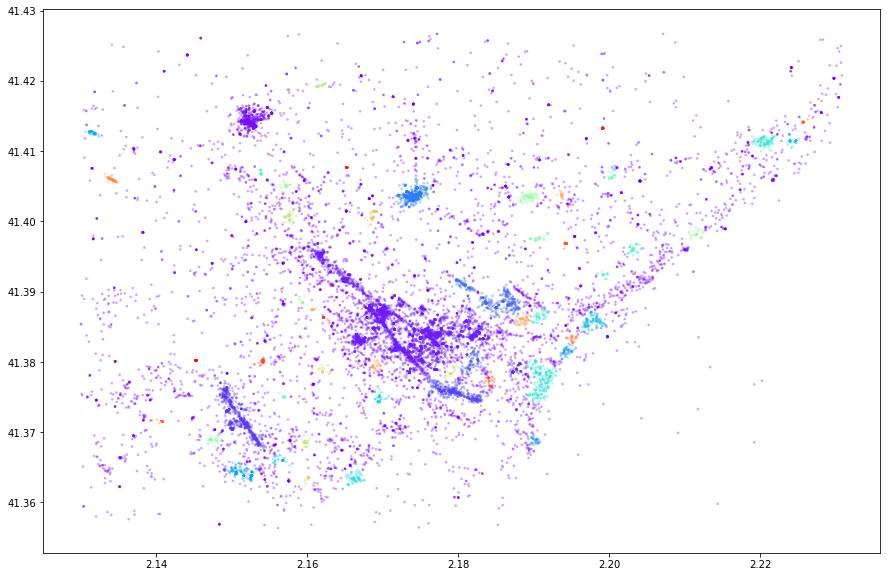

In [4]:
# Using DBSCAN algorithm to generate clusters 
geo = cluster.DBSCAN(eps=0.0008, min_samples=30).fit(geo_df)
plt.scatter(x=geo_df['longitude'], y=geo_df['latitude'], s=3, alpha=0.25, c=geo.labels_, cmap='rainbow')
plt.show()

In the dataset we have a lot of noise and several scattered points throughout the plot. In order to minimize the effect of this noise, we can assign a maximum distance between two samples, which serves to limit the distance of a point of interest from the city. Additionally, being able to select the minimum number of samples to consider as a cluster allows us to define how many points are necessary to consider as a tourist point of interest.

Another reason is the possibility that these tourist points may form irregular groups (like the example of the moon), where in this case we can observe a straight area in the center of the graph that could be the Eixample.

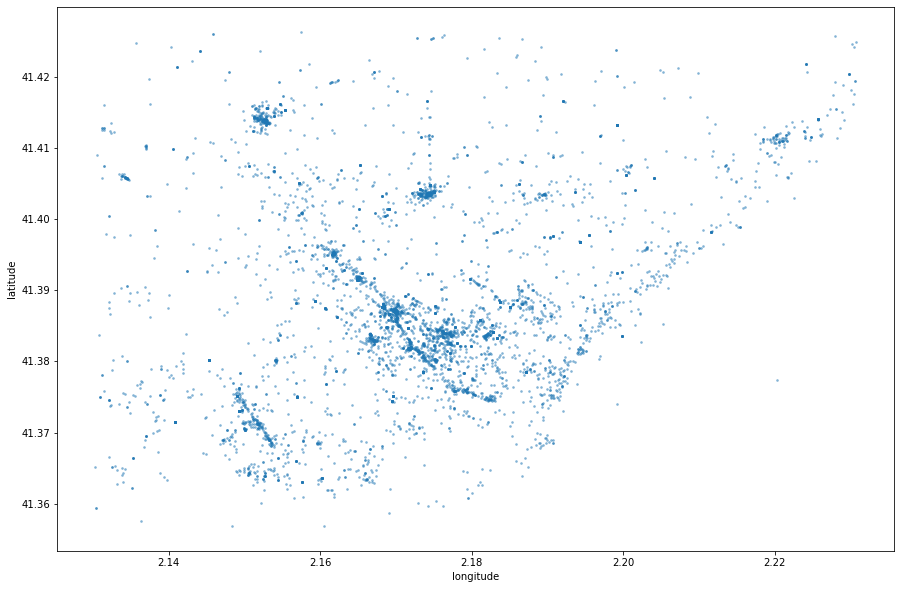

In [5]:
# Take only 1/3 of the original dataset
geo_sample = geo_df.sample(frac=0.3, random_state=1)

plt.scatter(x=geo_sample['longitude'], y=geo_sample['latitude'], s=3, alpha=0.4)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

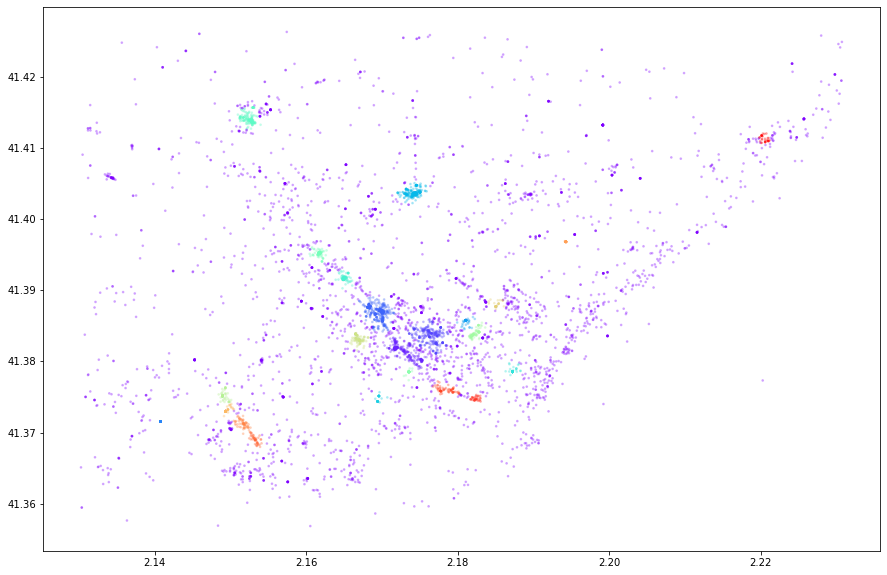

In [6]:
# Cluster the reduced dataset
geo = cluster.DBSCAN(eps=0.0008, min_samples=30).fit(geo_sample)
plt.scatter(x=geo_sample['longitude'], y=geo_sample['latitude'], s=3, alpha=0.25, c=geo.labels_, cmap='rainbow')
plt.show()

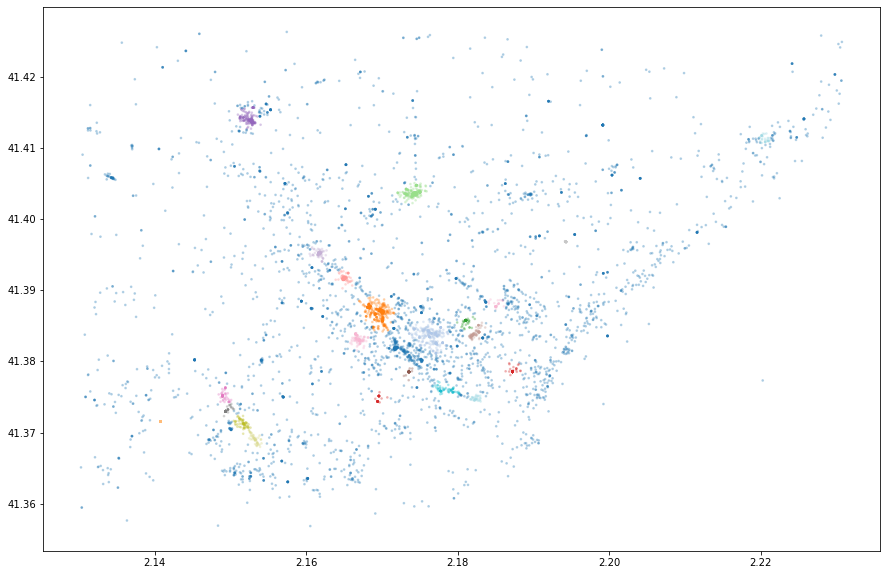

In [7]:
# tab20
geo = cluster.DBSCAN(eps=0.0008, min_samples=30).fit(geo_sample)
plt.scatter(x=geo_sample['longitude'], y=geo_sample['latitude'], s=3, alpha=0.25, c=geo.labels_, cmap='tab20')
plt.show()

In [9]:
# We add the labels from the DBSCAN to the dataframe and remove the negative rows
geo_sample['label'] = geo.labels_
geo_sample_2 = geo_sample.drop(geo_sample[geo_sample['label'] < 0].index)


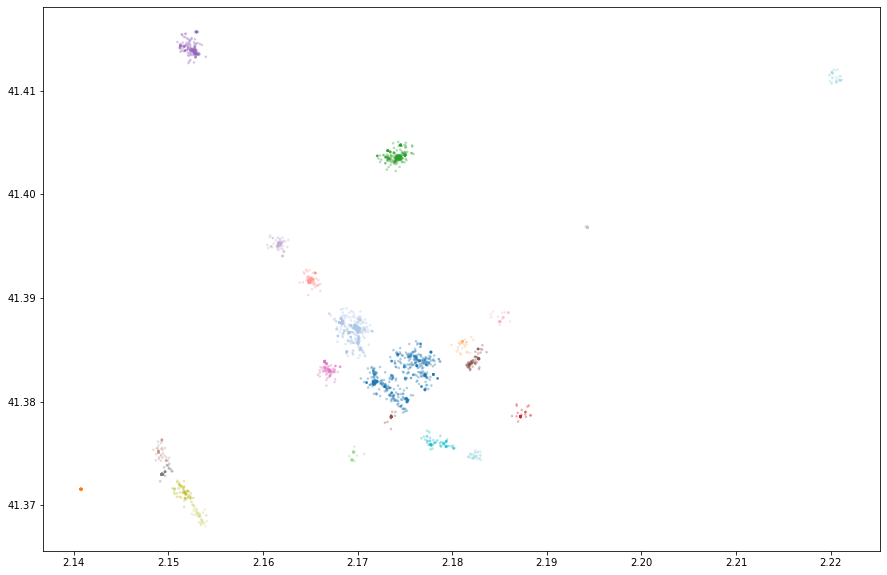

In [10]:
plt.scatter(x=geo_sample_2['longitude'], y=geo_sample_2['latitude'], s=3, alpha=0.25, c=geo_sample_2['label'], cmap='tab20')
plt.show()

Although I don't know all the places in Barcelona, we can observe and deduce that the purple point in the upper part is probably Park Güell. The green point is very likely to be the Sagrada Familia due to the distance from Park Güell. And the cluster line that starts with gray, pink, light blue, dark blue... should be points of interest in the Eixample like Casa Milà, Casa Batlló, etc.

Based on the minimum number of samples (at least 30 photos on Flickr) and the above deductions, we can conclude with certainty that each cluster shown in the image is very likely a tourist point of interest.


Now we use smopy librare to plot the custers on a a map so we can identify the places easily

In [11]:
import smopy
import matplotlib.image as mpimg
mapa = smopy.Map((41.3560, 2.1300, 41.4267, 2.2319))
geo_sample_2['longitude2'], geo_sample_2['latitude2']= mapa.to_pixels(geo_sample_2['latitude'], geo_sample_2['longitude'])

Lowered zoom level to keep map size reasonable. (z = 13)


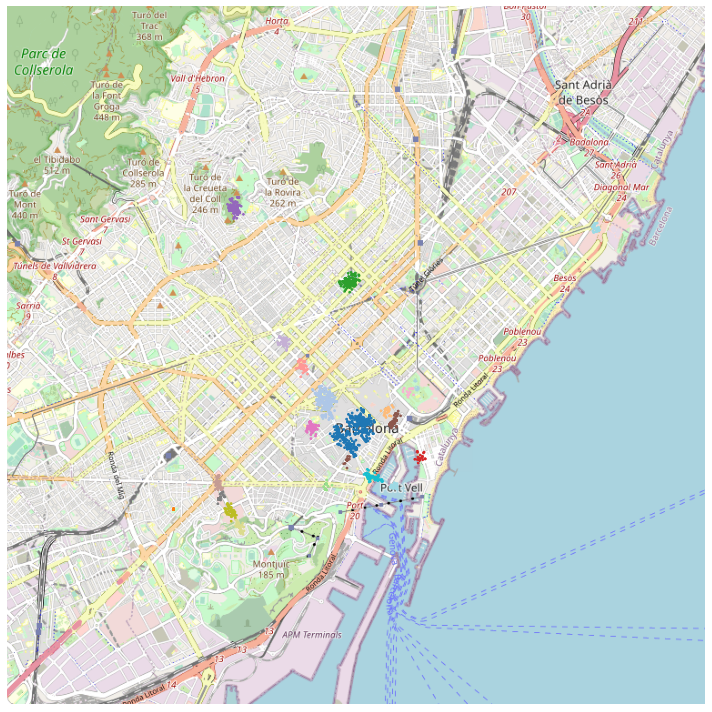

In [12]:
ax = mapa.show_mpl(figsize=(15, 10))
ax.scatter(geo_sample_2['longitude2'], geo_sample_2['latitude2'], s=3, alpha=1, c=geo_sample_2['label'], cmap='tab20')
plt.show()